# Quickhire

## Vector Representations

- 1. Clean: Job Listings from current database:
- 2. Spacy to tokenize the listings
- 3. Scikit-Learn's CountVectorizer to get word counts for each listing.
- 4. Visualize the most common word counts
- 5. Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix
- 6. Created a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings.

In [1]:
""" Import Statements """

# Classics
import pandas as pd
import numpy as np

# Base
from collections import Counter
import re
import string

# Plotting
import squarify
import seaborn as sns
import matplotlib.pyplot as plt

#webscrapping
from bs4 import BeautifulSoup
import requests
import os
import time
import csv

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# NLP Libraries
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

import spacy
nlp = spacy.load("en_core_web_lg")

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()

## 1. Clean: Job Listings from current database:

In [2]:
pwd

'/Users/jorge/quickhire/Job-Funnel-ds-Data/Notebooks'

In [3]:
ls

Scraper1.2.ipynb         quickhire_dev_1.1.ipynb
new_scrape_data.csv      scraper.ipynb


In [4]:
# df = pd.read_csv("/Users/jorge/quickhire/Job-Funnel-ds-Data/Data/job_listings1.2.csv")
# replace blank flavor with ""
# df = df.replace(np.nan, '', regex=True)
# df.replace("?", np.NaN)
# df = df.rename(
#    columns={
#        "description_x": "job_description",
#        "description_y": "company_description",
#    }
#)
# print(df.shape)
# df.head(3)

In [5]:
pages = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

with open('/Users/jorge/quickhire/Job-Funnel-ds-Data/Data/data_scientist_jobs.csv', 'a', encoding='utf-8', newline='') as f_output:
    csv_print = csv.writer(f_output)
    
    file_is_empty = os.stat('/Users/jorge/quickhire/Job-Funnel-ds-Data/Data/data_scientist_jobs.csv').st_size == 0
    if file_is_empty:
        csv_print.writerow(['Job Title', 'Company', 'Location', 'Summary'])
        
    # get data from url
    for page in pages:
        source = requests.get('https://www.indeed.com/jobs?q=data+scientist&l=Miami,+FL&fromage=15&radius=25&start={}'.format(page)).text

        soup = BeautifulSoup(source, 'html.parser')
        # print(soup.prettify())

        for jobs in soup.find_all(class_='result'):
        #     print(jobs.prettify())
        #     print('------------')

            try:
                job_title = jobs.find('div', class_='title').text.strip()
            except Exception as e:
                job_title = None
#             print('Job Title', job_title)

            try:
                company = jobs.span.text.strip()
            except Exception as e:
                company = None
#             print('Company', company)
    
            try:
                location = jobs.find('div', class_='location accessible-contrast-color-location').text.strip()
            except Exception as e:
                location = None
#             print('Location', location)
    
            try:
                summary = jobs.find('div', class_='summary').text.strip()
            except Exception as e:
                summary = None
#             print('Summary', summary)
            
            csv_print.writerow([job_title, company, location, summary])


# jobs = soup.find(class_='result')
# print(jobs.prettify())

# job_title = jobs.a.text.strip()
# print(job_title)

# company = jobs.span.text.strip()
# print(company)

# location = jobs.find('div', class_='location accessible-contrast-color-location').text.strip()
# print(location)

# summary = jobs.find('div', class_='summary').text.strip()
# print(summary)

In [6]:
df_scrapping = pd.read_csv('/Users/jorge/quickhire/Job-Funnel-ds-Data/Data/data_scientist_jobs.csv')
df_scrapping = df_scrapping.replace(np.nan, '', regex=True)
df_scrapping.replace("?", np.NaN)
df_scrapping.head(10)

,Job Title,Company,Location,Summary
0,,HackerUSA,"Coral Gables, FL 33134",At least 3 years of experience working with us...
1,,SafraPay,,"Credit origination model development, analytic..."
2,,Mixed In Key,,This work will be 100% remote.\nWe're looking ...
3,,HackerUSA,,At least 3 years of experience working with us...
4,,US Department of Defense,,A. Specialized Experience: You must have at le...
5,,ChenMed,,"Statistics and analytical modeling, time-serie..."
6,,HackerUSA,"Coral Gables, FL 33134",At least 3 years of experience working with us...
7,,SafraPay,,"Credit origination model development, analytic..."
8,,Mixed In Key,,This work will be 100% remote.\nWe're looking ...
9,,HackerUSA,,At least 3 years of experience working with us...


In [7]:
df_scrapping.tail(10)

,Job Title,Company,Location,Summary
122,,Booz Allen Hamilton,,Applicants selected will be subject to a secur...
123,,Beckman Coulter Life Sciences,,"To accomplish all of this, you’ll need to buil..."
124,,Ascendo Resources,"Miami, FL 33131","Credit origination model development, analytic..."
125,,Jobot,"Miami, FL",Apply unsupervised and supervised machine lear...
126,,Jobot,"Miami, FL",Apply unsupervised and supervised machine lear...
127,,Ascendo Resources,"Miami, FL 33131","Credit origination model development, analytic..."
128,,Amzur,,"As a Data Scientist, you will discover busines..."
129,,Mixed In Key,,This work will be 100% remote.\nWe're looking ...
130,,Booz Allen Hamilton,,Applicants selected will be subject to a secur...
131,,Beckman Coulter Life Sciences,,"To accomplish all of this, you’ll need to buil..."


In [10]:
df.dtypes

Job Title    object
Company      object
Location     object
Summary      object
dtype: object

In [13]:
df['Summary'][0:]

0      At least 3 years of experience working with us...
1      Credit origination model development, analytic...
2      This work will be 100% remote.\nWe're looking ...
3      At least 3 years of experience working with us...
4      A. Specialized Experience: You must have at le...
5      Statistics and analytical modeling, time-serie...
6      At least 3 years of experience working with us...
7      Credit origination model development, analytic...
8      This work will be 100% remote.\nWe're looking ...
9      At least 3 years of experience working with us...
10     A. Specialized Experience: You must have at le...
11     Statistics and analytical modeling, time-serie...
12     Credit origination model development, analytic...
13     This work will be 100% remote.\nWe're looking ...
14     At least 3 years of experience working with us...
15     A. Specialized Experience: You must have at le...
16     Statistics and analytical modeling, time-serie...
17     At least 3 years of expe

In [14]:
# df['job_description'].head()

df['Summary'] = df['Summary'].str.replace(r'\\(x|n)[a-z0-9]{0,2}', ' ')
df['Summary'] = df['Summary'].str.replace(r'<[^<]+?>', '').str.replace(r'^b.', '')
df['Summary'] = df['Summary'].str.replace('/', ' ')
df['Summary'] = df['Summary'].str.replace(r"\s+", " ")
df['Summary'] = df['Summary'].str.replace('/\d\.\s+|[a-z]\)\s+|•\s+|[A-Z]\.\s+|[IVX]+\.\s+/g', "")

In [15]:
df['Summary']= df['Summary'].astype(str)

In [16]:
def punct_cleaning(column):
    processed_data = []
    for i in column:
        text = re.sub('[%s]' % string.punctuation, '', i).lower()
        processed_data.append(text)
    return pd.DataFrame(processed_data)

In [17]:
df['Summary'] = punct_cleaning(df['Summary'])
df['Summary'][10]

'specialized experience you must have at least one year 52 weekof specialized experience at the gs9 or equivalent level specialized experience is…'

## 2. Use Spacy to tokenize the listings:

In [18]:
nlp = spacy.load('en_core_web_lg')

In [19]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [20]:
#Tokenizer Pipe

tokens = []

# Make the tokens
for doc in nlp.pipe(df['Summary'], disable=['tagger', 'parser', 'ner']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop==False) & (token.is_punct==False):
           doc_tokens.append(token.text)
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [21]:
df['tokens'].head()

0    [3, years, experience, working, users, require...
1    [credit, origination, model, development, anal...
2    [work, 100, remote, looking, expert, knowledge...
3    [3, years, experience, working, users, require...
4    [specialized, experience, year, 52, weekof, sp...
Name: tokens, dtype: object

In [23]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

df['lemmas'] = df['Summary'].apply(get_lemmas)

In [25]:
print(df.shape) 
df.head()

(132, 6)


,Job Title,Company,Location,Summary,tokens,lemmas
0,,HackerUSA,"Coral Gables, FL 33134",at least 3 years of experience working with us...,"[3, years, experience, working, users, require...","[3, year, experience, work, user, requirement,..."
1,,SafraPay,,credit origination model development analytics...,"[credit, origination, model, development, anal...","[credit, origination, model, development, anal..."
2,,Mixed In Key,,this work will be 100 remote were looking for ...,"[work, 100, remote, looking, expert, knowledge...","[work, 100, remote, look, expert, knowledge, h..."
3,,HackerUSA,,at least 3 years of experience working with us...,"[3, years, experience, working, users, require...","[3, year, experience, work, user, requirement,..."
4,,US Department of Defense,,specialized experience you must have at least ...,"[specialized, experience, year, 52, weekof, sp...","[specialized, experience, year, 52, weekof, sp..."


## 3. Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [26]:
# create the transformer:
vect = CountVectorizer(stop_words='english')

#Learn our Vocab
vect.fit(df['Summary'])

# Get sparse dtm
dtm = vect.transform(df['Summary'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dtm.head()

,100,1099,52,access,accomplish,algorithms,analysis,analytical,analytics,analyze,...,useful,users,valuable,waiting,warehouse,weekof,work,working,year,years
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [27]:
dtm.shape 

(132, 139)

## 4) Visualize the most common word counts

In [28]:
doc_len = [len(doc) for doc in df]

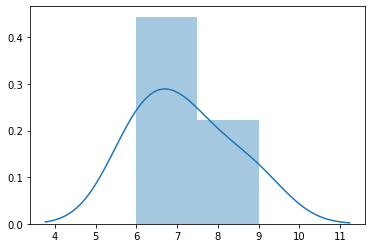

In [29]:
sns.distplot(doc_len)
plt.show()

In [30]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [49]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
9,experience,75,97,1.0,0.052291,0.052291,0.568182
36,learning,42,53,2.0,0.028571,0.080863,0.318182
45,data,37,53,3.0,0.028571,0.109434,0.280303
5,developing,22,44,4.0,0.023720,0.133154,0.166667
7,analytics,44,44,5.0,0.023720,0.156873,0.333333


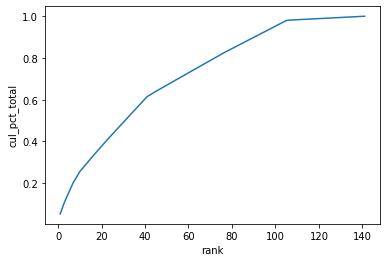

In [50]:
# cumlative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

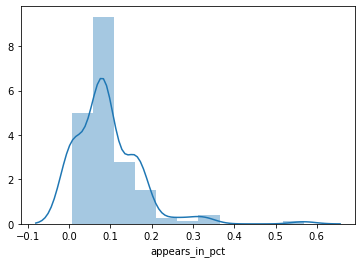

In [32]:
# Frequency of apperances
sns.distplot(wc['appears_in_pct'])
plt.show()

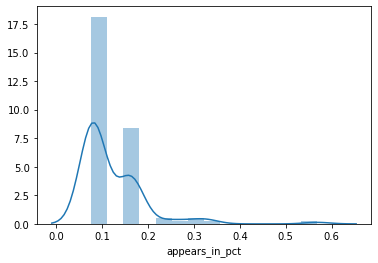

In [33]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct'])
plt.show()

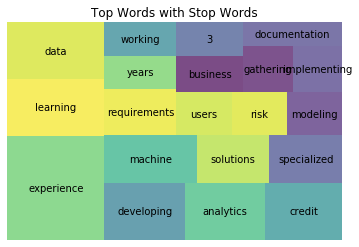

In [34]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7)
plt.title('Top Words with Stop Words')
plt.axis('off')
plt.show()

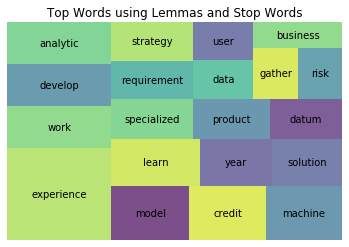

In [35]:
wc = count(df['lemmas']) 
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7 )
plt.axis('off')
plt.title('Top Words using Lemmas and Stop Words')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [36]:
# instantiate vectorizer object:
tfidf = TfidfVectorizer(max_df=.97,
                        min_df=3,
                        stop_words='english')

# create a vocabulary and get word counts per document:
dtm_tfidf = tfidf.fit_transform(df['Summary'])

# print word counts

# get feature names to use as dataframe column headers:
dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

# view Feature Matrix as DataFrame:
dtm_tfidf.head()

,100,52,access,accomplish,algorithms,analysis,analytical,analytics,applicants,apply,...,understand,understanding,unsupervised,use,users,weekof,work,working,year,years
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.215735,0.0,0.0,...,0.0,0.0,0.0,0.0,0.280819,0.000000,0.000000,0.280819,0.000000,0.280819
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.174324,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.272814,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.272814,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.215735,0.0,0.0,...,0.0,0.0,0.0,0.0,0.280819,0.000000,0.000000,0.280819,0.000000,0.280819
4,0.000000,0.243341,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.243341,0.000000,0.000000,0.243341,0.000000


## 6) NearestNeighbor Model 

In [42]:
# fit on dtm_tfidf:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [43]:
jobs_description =['I am searching for an entry-level data science position. Currently, hold a degree in television and motion pictures. Certificate in project management and knowledge of Python, SQL, Data Visualization, Machine Learning, Linear Algebra, Databases, Statistics and Modeling, Natural Language Processing. Benefits, Health Insurance, Vacation Paid time off, Performance Bonuses, 401k, Retirement Plan, Employee Development Programs.']   

In [44]:
job_search = tfidf.transform(jobs_description)

In [45]:
nn.kneighbors(job_search.todense())

(array([[0.98927265, 1.06602365, 1.06602365, 1.06602365, 1.06602365]]),
 array([[101,   5,  11,  41,  47]]))

In [47]:
df['Summary'].iloc[47]

'statistics and analytical modeling timeseries data analysis forecasting modeling machine learning algorithms optimization and deep learning approaches and…'